### Name: Umer Farooq
### S.NO: 13
### Trade: AI
### Topic: Data Preprocessing & Linear Regression Case Study

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Loading the dataset

In [2]:
df = pd.read_csv('CarSelling Portal Data.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Inspecting the Dataset:
## Preprocessing:

In [3]:
# Shape of the data
df.shape
# Number of rows and columns

(4345, 9)

In [4]:
# Data types of each column
df.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [5]:
# Descriptive statistics of each column/feature
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
# Name coulmns that have missing values
missing_values = [c for c in df.columns if df[c].isnull().sum() > 0]
missing_values

['Price', 'EngineV']

In [7]:
# Count of missing values in each column
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

### Removing the missing values: 

In [8]:
# Imputing the missing values in 'Price', 'EngineV' using KNN
df[['Price', 'EngineV']] = df.groupby(['Brand'])['Price', 'EngineV'].transform(lambda x: x.fillna(x.median()))

/var/folders/dk/_cfdg6bd67zbn7r4nmk7qpnm0000gn/T/ipykernel_23966/3708043311.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[['Price', 'EngineV']] = df.groupby(['Brand'])['Price', 'EngineV'].transform(lambda x: x.fillna(x.median()))


In [9]:
# Describe the data
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4345.000000,4345,4345.000000,4345.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19168.256838,NaN,161.237284,2.777107,NaN,NaN,2006.550058,NaN
std,NaN,25107.999851,NaN,105.705797,4.979468,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7100.000000,NaN,86.000000,1.900000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,20900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring PDFs:

In [10]:
df.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


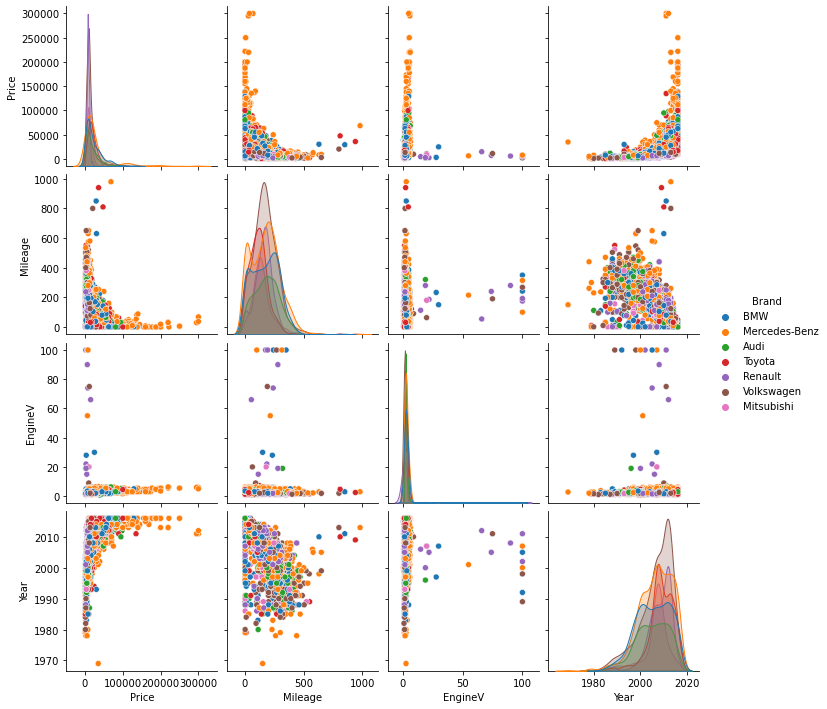

In [11]:
# Lets check insights from the data using sns pairplot
sns.pairplot(data = df, diag_kind='kde', hue='Brand')

/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

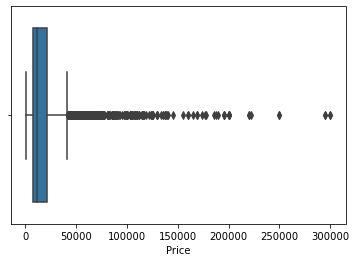

In [12]:
# Draw boxplot of 'Price'
sns.boxplot(df['Price'])
# It is positively skewed and has a lot of outliers to the right

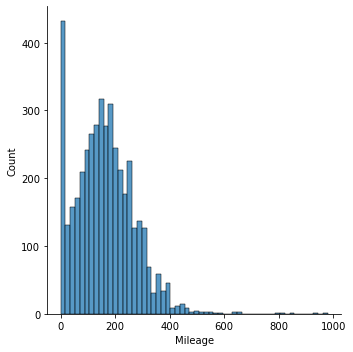

In [13]:
# Draw distplot of 'Milage'
sns.displot(df['Mileage'])
# As shown in fig, boxplot of mileage has outliers to the right

/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

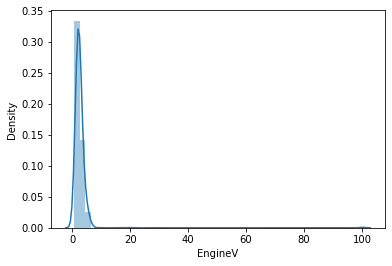

In [14]:
# Draw distplot of 'EngineV'
sns.distplot(df['EngineV'])
# It is also right skewed

/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

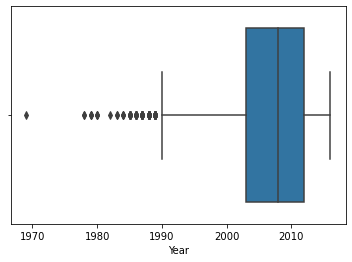

In [15]:
# Draw distplot of 'Year'
sns.boxplot(df['Year'])
# Year is negatively skewed

### Handling Outliers:

To handle outliers, we use different methods.
Some of them are:
1. IQR: Interquartile Range
2. Z-score: Standard Deviation

Here, in this case, we will use IQR method.

In [16]:
# Lets use IQR for Price, EngineV and Mileage
IQR_price = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)

IQR_EngineV = df['EngineV'].quantile(0.75) - df['EngineV'].quantile(0.25)

IQR_Mileage = df['Mileage'].quantile(0.95) - df['Mileage'].quantile(0.25)


In [17]:
# As Price has Positively skewed distribution:
p = df['Price'].quantile(.98) + 1.5 * IQR_price
print(p)
df_ = df[df['Price'] < p]

121035.9999999997


In [18]:
m = df['Mileage'].quantile(0.99) + 1.5 * IQR_Mileage
print(m)
df_2 = df_[df_['Mileage'] < m]

821.0


In [19]:
e = df['EngineV'].quantile(0.99) + 1.5 * IQR_EngineV
print(e)
df_3 = df_2[df_2['EngineV'] < e]

7.65


In [20]:
y = df['Year'].quantile(0.05)
print(y)
df_4 = df_3[df_3['Year'] > y]

1994.0


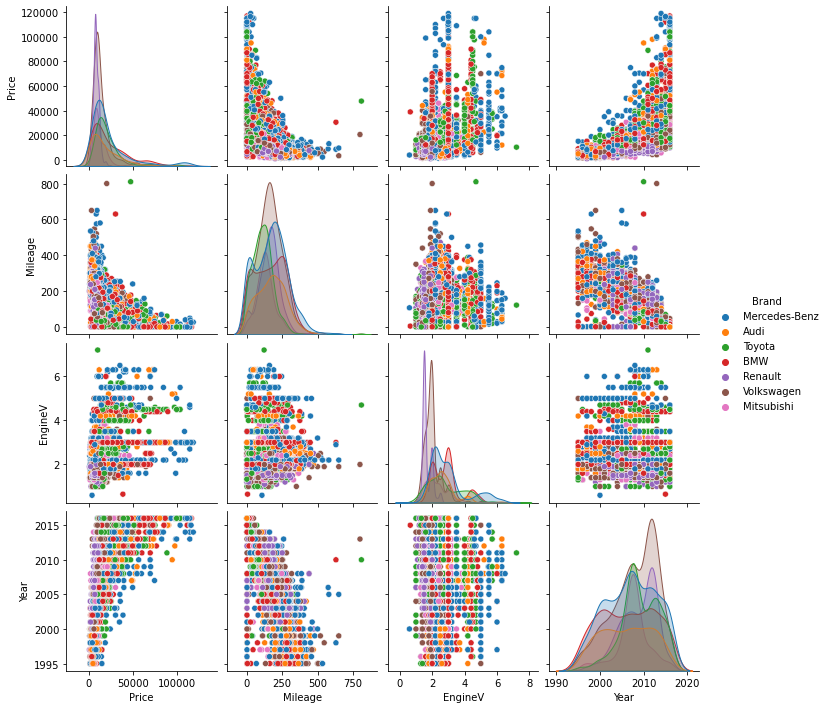

In [21]:
# Draw pair of boxplots of 'Price', 'Mileage', 'Year' and 'EngineV'
sns.pairplot(data = df_4, diag_kind='kde', hue='Brand')

In [22]:
df_5 = df_4.reset_index(drop=True)
df_5.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4024,4024.000000,4024,4024.000000,4024.000000,4024,4024,4024.000000,4024
unique,7,NaN,6,NaN,NaN,4,2,NaN,286
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,863,NaN,1466,NaN,NaN,1941,3647,NaN,174
mean,NaN,18185.056874,NaN,155.988569,2.476153,NaN,NaN,2007.483350,NaN
std,NaN,18073.606725,NaN,98.510098,0.955925,NaN,NaN,5.345086,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1995.000000,NaN
25%,NaN,7700.000000,NaN,86.000000,1.900000,NaN,NaN,2004.000000,NaN
50%,NaN,12000.000000,NaN,152.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21225.000000,NaN,220.000000,3.000000,NaN,NaN,2012.000000,NaN


### Transforming the data to make it suitable for Linear Regression:

##### We can use the following methods to transform the data: 
##### Log Transformation: It is used to transform the data to log scale.
##### We transform the data becasue the data is not normally distributed. If so, the result of the model will be biased.


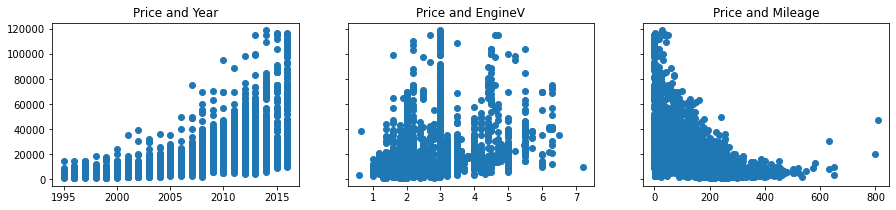

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df_5['Year'],df_5['Price'])
ax1.set_title('Price and Year')
ax2.scatter(df_5['EngineV'],df_5['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(df_5['Mileage'],df_5['Price'])
ax3.set_title('Price and Mileage')
plt.show()

### Relaxing the Examples:

In [24]:
log_price = np.log(df_5['Price'])
df_5['log_price'] = log_price
df_5
# np.log is used to convert the price to log scale because price values are very large

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
4,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320,8.716044
...,...,...,...,...,...,...,...,...,...,...
4019,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
4020,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
4021,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557
4022,Toyota,14200.0,sedan,31,2.5,Petrol,yes,2014,Corolla,9.560997


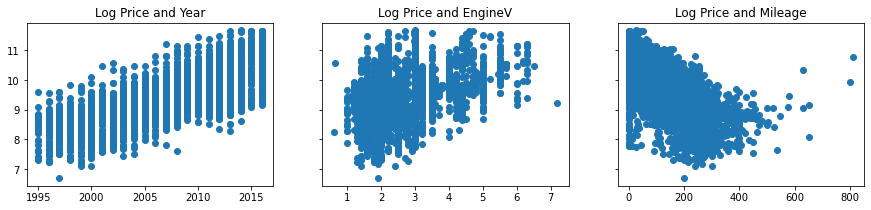

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df_5['Year'],df_5['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(df_5['EngineV'],df_5['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(df_5['Mileage'],df_5['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

#### Dropping the Price column:

In [26]:
df_6 = df_5.drop(['Price'],axis=1)

### Multicollinearity:

In [27]:
df_6.shape

(4024, 9)

##### Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [28]:
# Finf VIF for each feature and drop the features with high VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_6[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i)
for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [29]:
vif

,VIF,features
0,3.486216,Mileage
1,10.213232,Year
2,7.706997,EngineV


In [30]:
data_no_multicollinearity = df_6.drop(['Year'],axis=1)

### Create Dummy Variables:

In [31]:
# There are methods to create dummy variables for categorical variables
# such as OneHotEncoding, LabelEncoding, LabelBinarization, get_dummies

data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,438,2.0,8.716044,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,163,2.5,9.350102,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4020,35,1.6,9.792556,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4021,1,3.5,8.779557,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4022,31,2.5,9.560997,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_116', 'Model_118', 'Model_120', 'Model_200', 'Model_210',
       'Model_220', 'Model_250', 'Model_316', 'Model_318', 'Model_320',
       'Model_323', 'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645', 'Model_650', 'Model_728', 'Model_730',
       'Model_735', 'Model_740', 'Model_745', 'Model_750', 'Model_760',
       'Model_80', 'Model_

### Linear Regression Model:

#### Declare input and output variables

In [33]:
targets = data_with_dummies['log_price']
inputs = data_with_dummies.drop(['log_price'],axis=1)

# Log_Price is the target variable becasue it is the independent variable

##### StandardScaler is an important technique that is mainly performed as a preprocessing step before many machine learning models, in order to standardize the range of functionality of the input dataset.

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [34]:
# Standard Scaler is used to scale the data and it is method of Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [35]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split:

In [36]:
# train test split is used to split the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#### Create The Regression Model:

In [37]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [38]:
y_hat = reg.predict(x_train)

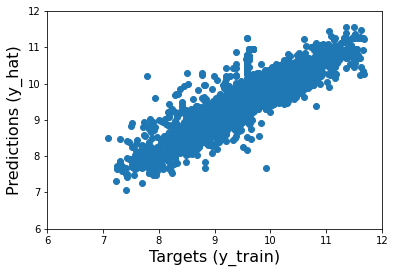

In [39]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=16)
plt.ylabel('Predictions (y_hat)',size=16)
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()

Error:  3051    0.157284
1589   -0.269181
2851   -0.390016
3050    0.494830
381     0.046464
          ...   
428    -0.565418
859    -0.050868
801    -0.043409
2740    0.125619
3666   -0.156844
Name: log_price, Length: 3219, dtype: float64


/Users/umerfarooq/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

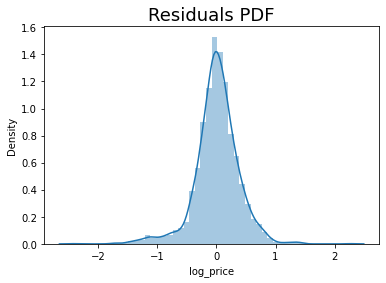

In [40]:
print("Error: ",y_train - y_hat)

sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)


# Residuals: The difference between an observed value of the response variable and 
# the value of the response variable predicted from the regression line.

In [41]:
reg.score(x_train,y_train)

0.7914340673737361